# Hyperparameter Tuning 

Finidng the best model by tuning the model

## Importing Necessary Libraries

In [49]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Data Preparation

In [50]:
digits = load_digits()

In [51]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [52]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

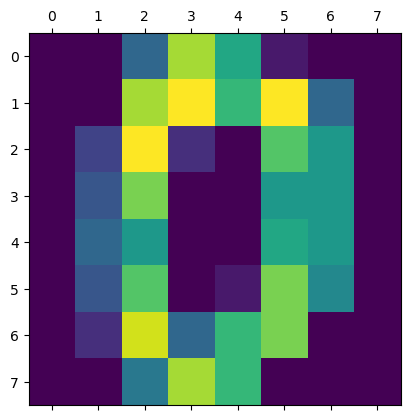

In [53]:
plt.matshow(digits.images[0])

## Assigning the X and y

In [54]:
X = digits.data
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [55]:
y = digits.target
y[:5]

array([0, 1, 2, 3, 4])

## Splitting the Data into Train and Test Data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Finding the best Model

- SVC
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier
- GaussianNB
- MultinomialNB

In [57]:
model_list = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100,120,150],
            'criterion': ['gini','entropy']
        }
    },

    'gaussian': {
        'model': GaussianNB(),
        'params': {
            'priors':[None, [0.4,0.6]]
        }
    },

    'multinomial': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.2, 0.5, 0.7, 1.0]
        }
    }
}

In [58]:
scores = []
for model_name, model_params in model_list.items():

    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    grid_search.fit(X_train, y_train)

    scores.append({
        'model': model_name,
        'model_params': grid_search.best_params_,
        'best_score': grid_search.best_score_

    })

In [59]:
score_data_frame = pd.DataFrame(scores, columns=['model', 'model_params', 'best_score'])
score_data_frame

,model,model_params,best_score
0,svm,"{'C': 1, 'kernel': 'linear'}",0.977739
1,logistic_regression,{'C': 1},0.963824
2,decision_tree,{'criterion': 'entropy'},0.853172
3,random_forest,"{'criterion': 'entropy', 'n_estimators': 150}",0.979830
4,gaussian,{'priors': None},0.855938
5,multinomial,{'alpha': 1.0},0.903971


## Model Creation

In [60]:
support_vector_machine = SVC(gamma='auto', C=1, kernel='linear')

## Model Training

In [62]:
support_vector_machine.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

## Model Prediction

In [66]:
y_pred = support_vector_machine.predict(X_test)
y_pred[:5]

array([0, 8, 6, 6, 0])

In [73]:
selected_prediction = support_vector_machine.predict([digits.data[90]])
selected_prediction

array([1])

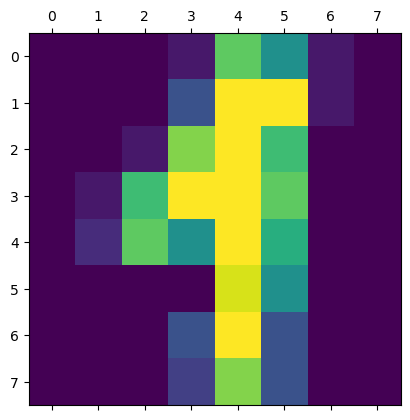

In [74]:
plt.matshow(digits.images[90])

## Model Evaluation